In [1]:
import pandas as pd

df = pd.read_csv('../data/student-mat.csv', sep=';')
df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [2]:
# Shape of the dataset
print("Shape:", df.shape)

# Columns and data types
print("\nInfo:")
print(df.info())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Basic statistics (numerical columns)
print("\nDescribe:")
print(df.describe())


Shape: (395, 33)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null  

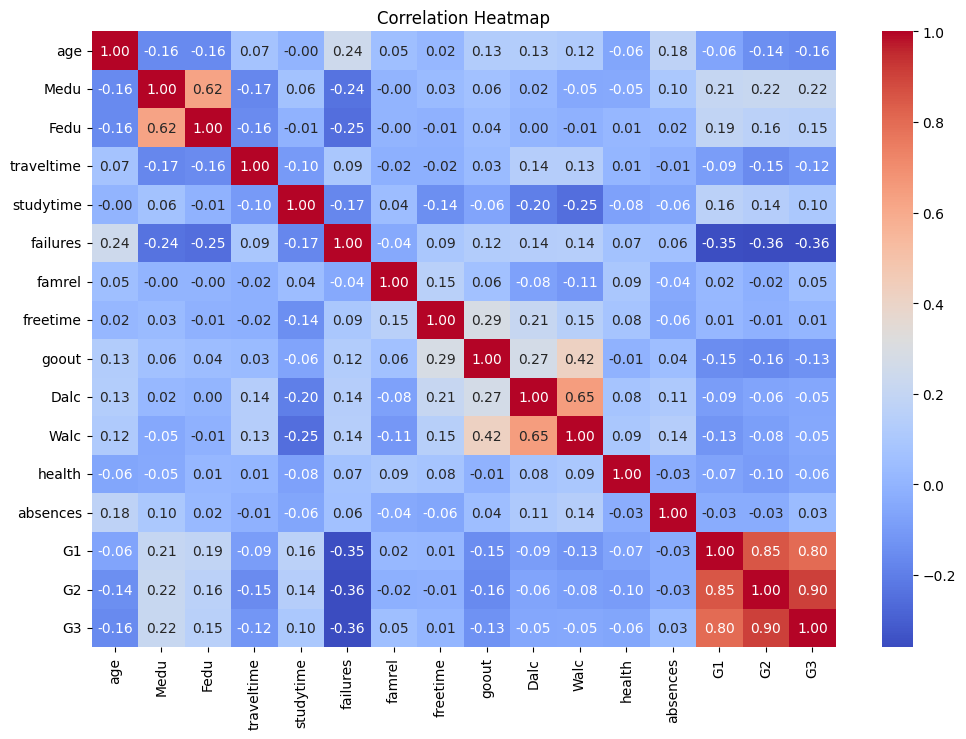

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix (numeric columns only)
correlation = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


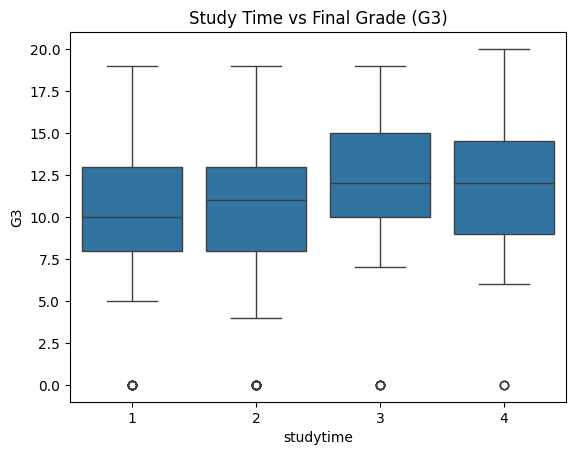

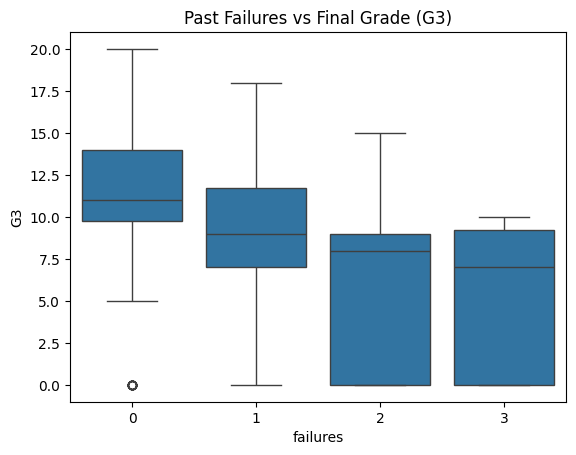

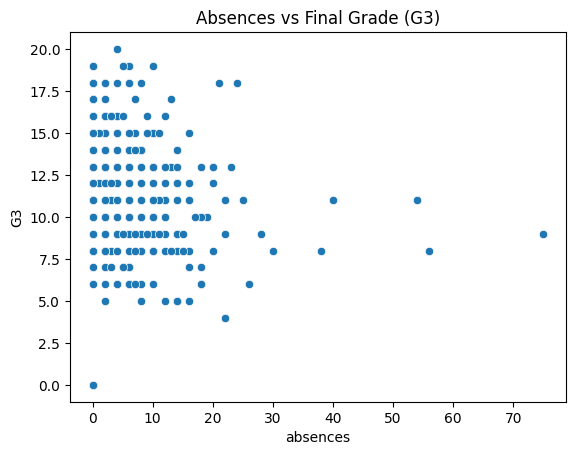

In [4]:
# Study time vs G3
sns.boxplot(x='studytime', y='G3', data=df)
plt.title("Study Time vs Final Grade (G3)")
plt.show()

# Failures vs G3
sns.boxplot(x='failures', y='G3', data=df)
plt.title("Past Failures vs Final Grade (G3)")
plt.show()

# Absences vs G3
sns.scatterplot(x='absences', y='G3', data=df)
plt.title("Absences vs Final Grade (G3)")
plt.show()


In [5]:
# Copy dataframe to avoid modifying original
data_model = df.copy()

# One-hot encode all categorical variables automatically
data_model = pd.get_dummies(data_model, drop_first=True)

# Display shape and columns after encoding
print("Shape after encoding:", data_model.shape)
print("Columns:")
print(data_model.columns)


Shape after encoding: (395, 42)
Columns:
Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'school_MS', 'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other', 'schoolsup_yes', 'famsup_yes', 'paid_yes',
       'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes',
       'romantic_yes'],
      dtype='object')


In [6]:
from sklearn.model_selection import train_test_split

# Target variable
y = data_model['G3']

# Features — drop G3
X = data_model.drop('G3', axis=1)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (316, 41)
Test shape: (79, 41)


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize model
lr = LinearRegression()

# Fit the model to training data
lr.fit(X_train, y_train)

# Predict on test data
y_pred = lr.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Results")
print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Linear Regression Results
Mean Squared Error: 5.656642833231225
R2 Score: 0.7241341236974019


In [8]:
from sklearn.tree import DecisionTreeRegressor

# Initialize Decision Tree
dt = DecisionTreeRegressor(random_state=42)

# Fit to training data
dt.fit(X_train, y_train)

# Predict on test data
y_pred_dt = dt.predict(X_test)

# Evaluate
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Regressor Results")
print("Mean Squared Error:", mse_dt)
print("R2 Score:", r2_dt)


Decision Tree Regressor Results
Mean Squared Error: 4.2025316455696204
R2 Score: 0.795048916950583


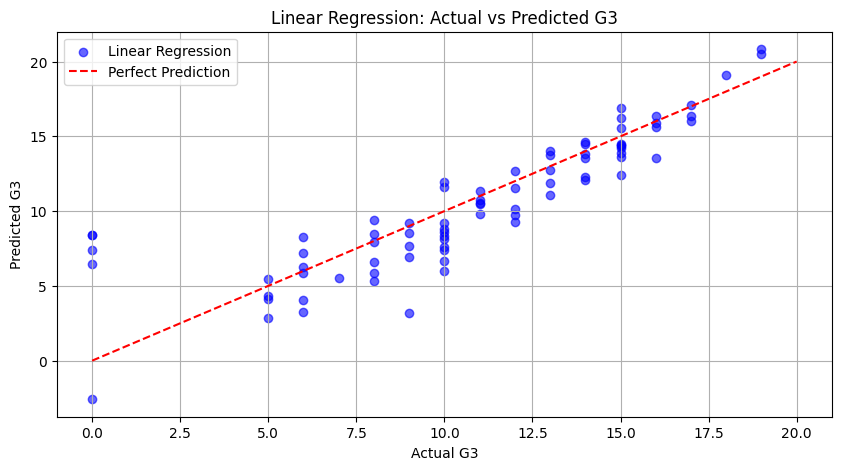

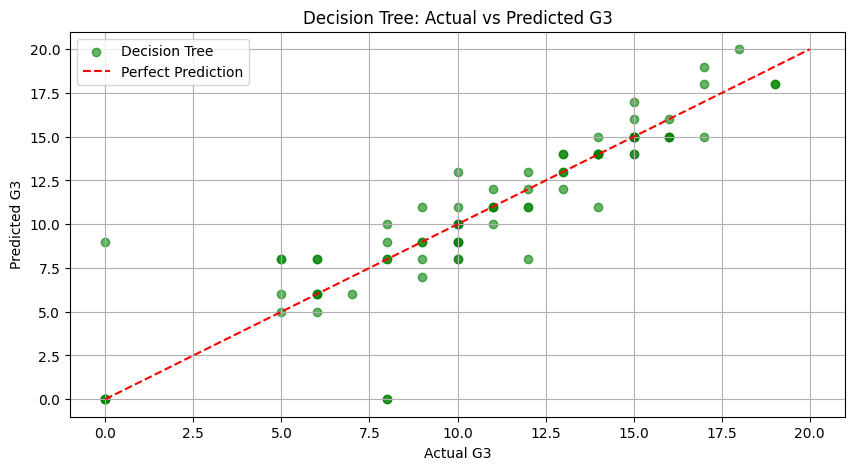

In [10]:
import matplotlib.pyplot as plt

# Linear Regression: Actual vs Predicted
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Linear Regression')
plt.plot([0, 20], [0, 20], 'r--', label='Perfect Prediction')
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.title("Linear Regression: Actual vs Predicted G3")
plt.legend()
plt.grid(True)
plt.show()

# Decision Tree: Actual vs Predicted
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_dt, color='green', alpha=0.6, label='Decision Tree')
plt.plot([0, 20], [0, 20], 'r--', label='Perfect Prediction')
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.title("Decision Tree: Actual vs Predicted G3")
plt.legend()
plt.grid(True)
plt.show()


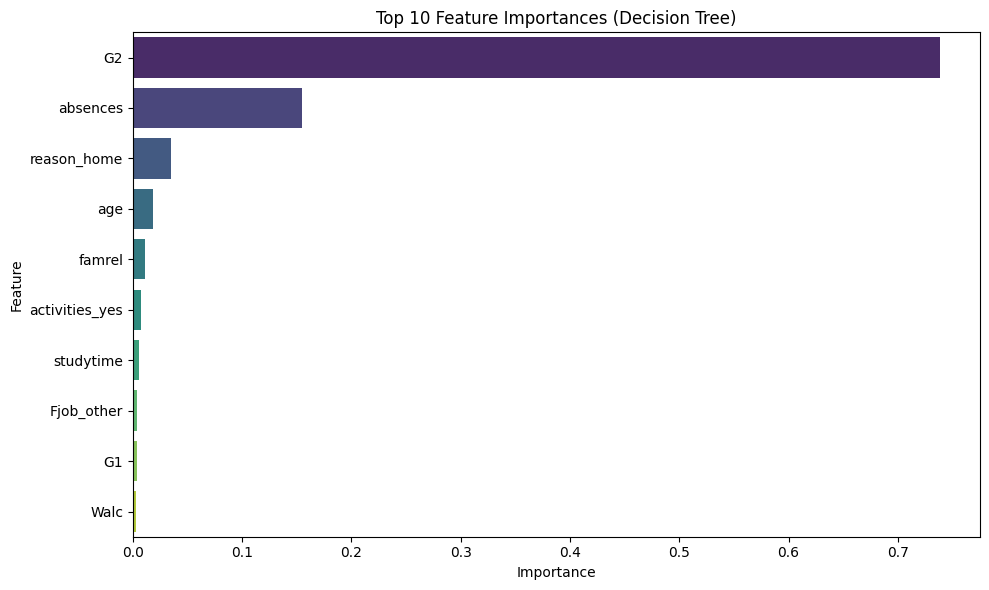

In [12]:
# Get feature importances from Decision Tree
importances = dt.feature_importances_
feature_names = X.columns

# Combine into DataFrame for sorting and display
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df.head(10), hue='Feature', legend=False, palette='viridis')
plt.title("Top 10 Feature Importances (Decision Tree)")
plt.tight_layout()
plt.show()
